<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Good)</span></div>

## Random numbers from other distributions

### Random numbers from the Normal distribution

In [1]:
np.random.normal(loc=5, scale=2, size=10)


array([3.13769563, 4.72307463, 8.00978053, 7.33814909, 3.24922494,
       5.94510775, 4.73793768, 5.66555833, 4.67958375, 3.38405708])

### Visualising the random numbers

Text(0, 0.5, 'Value of random number')

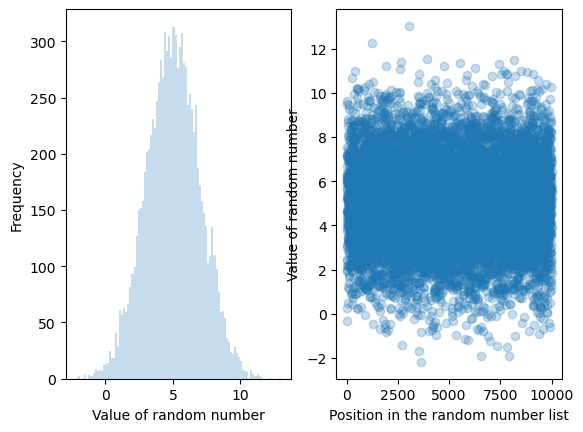

In [3]:
from matplotlib import pyplot as plt

n = 1_000_0
random_numbers = np.random.normal(loc=5, scale=2, size=n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")


###  68%?

In [4]:
n = 10_000
mean, sd = 5, 2
random_numbers = np.random.normal(loc=mean, scale=sd, size=n)

mask = (random_numbers >= mean - sd) & (random_numbers <= mean + sd)

print(f'% of points between 1 std.dev. from the mean: {np.sum(mask)/n*100:.2f}%')


% of points between 1 std.dev. from the mean: 66.93%


## Brownian Motion in 1D

###  The scenario

In [8]:
def brown_1d(prob_right=.5, no_of_steps=10000):
    ''' 
        This function returns the final position of the particle 
        after the number of steps.
        prob_right is the probability of going right.
    '''

    step_size = 1    
    x = 0                               # starting x position

    for _ in range(no_of_steps):
        if rnd.random() < prob_right:   # Go right?
            x += step_size
        else:
            x -= step_size

    return x


### The simulation

Text(0.5, 1.0, 'Probability distribution for 1D Random walk with p=0.5')

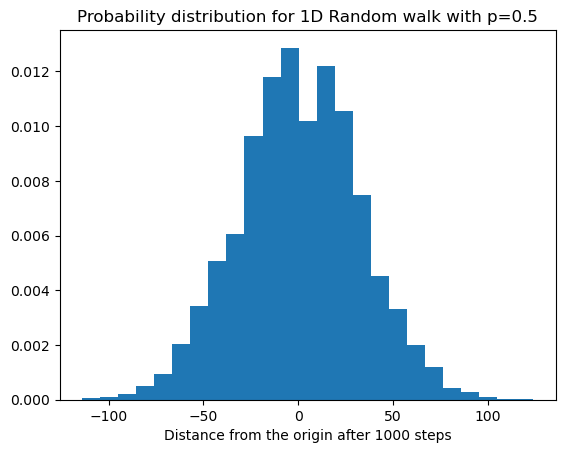

In [9]:
import numpy.random as rnd

no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')



### What does theory say?

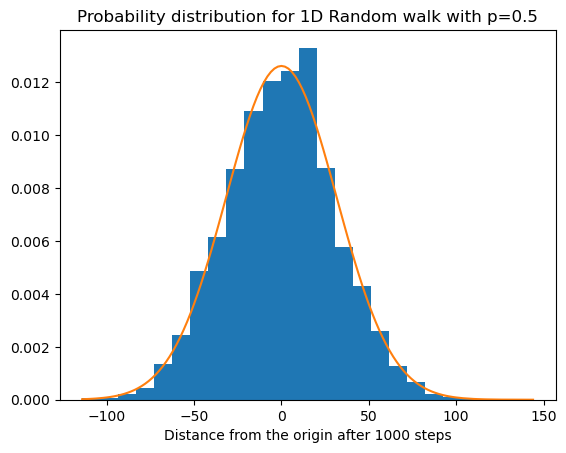

In [13]:
import numpy.random as rnd

no_of_steps, p = 1_000, .5
repeats = 10_000
results = [brown_1d(prob_right=p, no_of_steps=no_of_steps)
           for _ in range(repeats)]

plt.hist(results, bins=25, density=True)
plt.xlabel(f'Distance from the origin after {no_of_steps} steps')
plt.title(f'Probability distribution for 1D Random walk with p={p}')

def normal(x, m=0, s=1):
    '''
    Probability density function for the
    Gaussian distribution.
    '''
    s2 = s**2
    output = np.exp(-(x-m)**2/(2*s2))
    output /= np.sqrt(2*np.pi*s2)
    return output
prob_right = p 
prob_left = 1 - prob_right                       # q = 1 -p
mean = no_of_steps * (prob_right - prob_left)    # mean = N(p - q)
sd = np.sqrt(4*no_of_steps*prob_right*prob_left) # sd = sqrt(4 N p q)
x = np.unique(results)                           # Numbers that form 
                                                 # the x-axis
plt.plot(x, normal(x, mean, sd), label='Theoretical')

## Estimating \(\pi\)

### The method

radius of the circle = 1 
N(total) = grains of sand **randomly** 'thrown' only the surface and landing on the green area 

pi approximately 4 (Ngreen/Ntotal) or number of sand that randomly lands in the area of the cirle 

###  A poor but intuitive solution

In [15]:
N_total = 100_000                             # Yes, Python allows the _
N_green = 0

for _ in range(N_total):
    x = rnd.uniform(low=-1, high=1, size=1)     
    y = rnd.uniform(low=-1, high=1, size=1)
    r = np.sqrt(x**2 + y**2)                   # Distance from the origin

    if r <= 1:
        N_green += 1                           # In or out of the circle

4 * N_green / N_total                          # Estimate for pi


3.14488

### A better solution

In [20]:
N_total=1_000_000
x=rnd.uniform(low=-1, high=1, size=N_total)
y=rnd.uniform(low=-1, high=1, size=N_total)
N_green= np.sum((x**2+y**2) <= 1)                # Oh! the ease of NumPy!

4 * (N_green / N_total)


3.140572

### A smarter solution

In [25]:
N_total=1_000_000
x=rnd.rand(N_total)
y=rnd.rand(N_total)
N_green=np.sum((x**2+y**2) <= 1)

4 * (N_green / N_total)


3.143164

## Exercise 1 :  Vital Stats of Random π

In [1]:
import random
import math 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
def estimate_pi(n):
    n_inside_circle = 0 
    x_list = []
    y_list = [] 
    for i in range (0,n):
        x = random.random()
        x_list.append(x)
        y = random.random()
        y_list.append(y)
    print(x_list, y_list)

estimate_pi(10)

[0.5484177577355205, 0.06482886504555907, 0.8406568957477543, 0.890254142662045, 0.7283255702139037, 0.315831232197337, 0.20455553529197745, 0.7588098431010243, 0.24340856496123853, 0.5036821399659385] [0.9298219619215617, 0.719781545844841, 0.3834529009391783, 0.7885758119657988, 0.7989554197491917, 0.26233556818377624, 0.8843545057824244, 0.662618262546734, 0.5227529642191286, 0.5483616698327355]


In [ ]:
def estimate_pi(n):
    n_inside_circle = 0 
    x_list = []
    y_list = [] 
    for i in range (0,n):
        x = random.random()
        x_list.append(x)
        y = random.random()
        y_list.append(y)
    for j in range (0,n):
        if(math.sqrt(x_list[j]**2+y_list[j]**2) <= 1):
            n_inside_circle += 1
    pi = 4*n_inside_circle/n
    return pi

plt.xscale('log')

n=10
results_100 = []
for i in range (0,n):
    results_100.append(estimate_pi(n))
    y = np.array(np.mean(results_100))
    x = np.array(n)
    e = np.array(np.std(results_100))
plt.errorbar(x,y,e, marker = 'o')


n=10**2
results_100 = []
for i in range (0,n):
    results_100.append(estimate_pi(n))
    y = np.array(np.mean(results_100))
    x = np.array(n)
    e = np.array(np.std(results_100))
plt.errorbar(x,y,e, marker = 'o')

n=10**3
results_100 = []
for i in range (0,n):
    results_100.append(estimate_pi(n))
    y = np.array(np.mean(results_100))
    x = np.array(n)
    e = np.array(np.std(results_100))
plt.errorbar(x,y,e, marker = 'o')

n=10**4                 # it works up to here, and then the kernal stops working, but bascially it works 
results_100 = []
for i in range (0,n):
    results_100.append(estimate_pi(n))
    y = np.array(np.mean(results_100))
    x = np.array(n)
    e = np.array(np.std(results_100))
plt.errorbar(x,y,e, marker = 'o')

n=10**5
results_100 = []
for i in range (0,n):
    results_100.append(estimate_pi(n))
    y = np.array(np.mean(results_100))
    x = np.array(n)
    e = np.array(np.std(results_100))
plt.errorbar(x,y,e, marker = 'o')

n=10**6
results_100 = []
for i in range (0,n):
    results_100.append(estimate_pi(n))
    y = np.array(np.mean(results_100))
    x = np.array(n)
    e = np.array(np.std(results_100))
plt.errorbar(x,y,e, marker = 'o')

n=10**7
results_100 = []
for i in range (0,n):
    results_100.append(estimate_pi(n))
    y = np.array(np.mean(results_100))
    x = np.array(n)
    e = np.array(np.std(results_100))
plt.errorbar(x,y,e, marker = 'o')
plt.show()

